In [1]:
import datetime
import pandas as pd
import numpy as np
import scipy as sp
from scipy import stats
import matplotlib as plt
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# depth

In [2]:
fn = r'C:\Users\Default\Documents\transect_depths.xlsx'
xl2 = pd.read_excel(fn, engine='openpyxl', sheet_name=None, parse_dates=True, index_col=0)
xl2.keys()

#for values in xl2.keys():
#    print(xl2[values])

dict_keys(['5', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '18', '19', '20', '22', '23', '24', '25', '26', '27', '29', '30', '31'])

In [3]:
fn = r'C:\Users\Default\Documents\transect_depths.xlsx'
xl2 = pd.read_excel(fn, engine='openpyxl', sheet_name=None, parse_dates=True, index_col=0)
#xl2.keys()

#for values in xl2.keys():
#    print(xl2[values])

for values in xl2.keys():
    
    xl2[values].loc['avg'] = xl2[values].mean()
    xl2[values].loc['stdv'] = xl2[values].std()

    xl2[values] = xl2[values].T
    xl2[values] = xl2[values].resample('10D').mean()

    xl2[values].reset_index(inplace=True)
    xl2[values]['day'] = xl2[values]['index'].dt.day
    xl2[values]['month'] = xl2[values]['index'].dt.month
    xl2[values]['year'] = xl2[values]['index'].dt.year

    xl2[values] = xl2[values].sort_values(by="index")
    xl2[values].set_index('index', inplace=True)
    
    cols = ['month']
    xl2[values][cols] = xl2[values][xl2[values][cols] != 5][cols]
    xl2[values].dropna(inplace=True)
    
    cols = ['month']
    xl2[values][cols] = xl2[values][xl2[values][cols] != 6][cols]
    xl2[values].dropna(inplace=True)

    cols = ['month']
    xl2[values][cols] = xl2[values][xl2[values][cols] != 7][cols]
    xl2[values].dropna(inplace=True)

    cols = ['month']
    xl2[values][cols] = xl2[values][xl2[values][cols] != 8][cols]
    xl2[values].dropna(inplace=True)
    

    
xl2['15']

,0,1,2,3,4,5,6,7,8,9,...,96,97,98,99,100,avg,stdv,day,month,year
index,,,,,,,,,,,,,,,,,,,,,
1966-09-29,30.0,18.0,12.0,12.0,15.0,15.0,23.0,12.0,12.0,13.0,...,12.0,22.0,16.0,18.0,15.0,16.891089,4.498407,29,9.0,1966
1966-10-19,27.0,38.0,19.0,21.0,17.0,17.0,28.0,29.0,31.0,30.0,...,30.0,29.0,25.0,25.0,30.0,23.940594,7.380496,19,10.0,1966
1966-11-18,23.0,67.0,27.0,30.0,36.0,37.0,30.0,18.0,16.0,0.0,...,27.0,33.0,5.0,38.0,4.0,18.861386,12.206985,18,11.0,1966
1966-12-18,21.0,21.0,6.0,58.0,33.0,0.0,30.0,26.0,17.0,12.0,...,20.0,15.0,20.0,17.0,8.0,22.603960,11.238265,18,12.0,1966
1967-01-17,22.0,24.0,61.0,34.0,25.0,33.0,8.0,30.0,39.0,0.0,...,30.0,31.0,25.0,5.0,6.0,25.693069,12.285984,17,1.0,1967
1967-02-16,20.0,13.0,13.0,24.0,35.0,28.0,10.0,15.0,20.0,32.0,...,12.0,42.0,66.0,49.0,30.0,27.009901,11.546287,16,2.0,1967
1967-03-18,24.0,22.0,14.0,39.0,16.0,21.0,35.0,32.0,27.0,41.0,...,37.0,32.0,27.0,24.0,7.0,31.237624,12.960067,18,3.0,1967
1967-04-17,20.0,22.0,23.0,23.0,22.0,47.0,20.0,37.0,28.0,38.0,...,36.0,38.0,34.0,27.0,9.0,31.574257,12.544058,17,4.0,1967


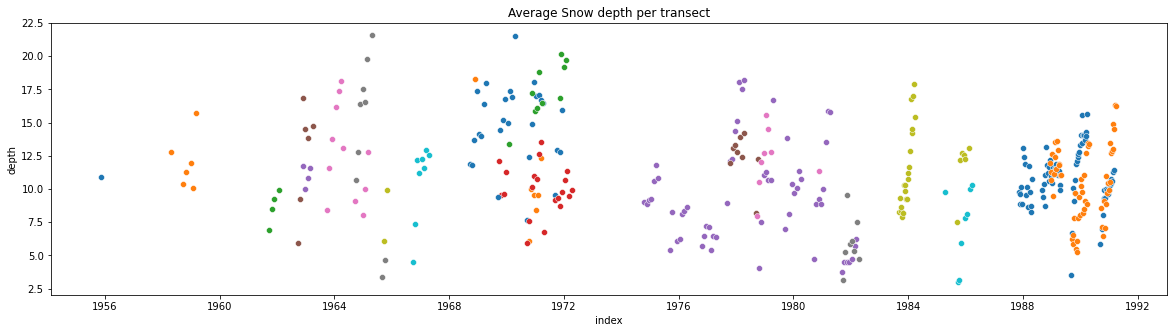

In [5]:
plt.figure(figsize=(20,5))
for values in xl2.keys():
    sns.scatterplot(x = xl2[values].index, y= xl2[values].stdv, data=xl2[values]);
    plt.title('Average Snow depth per transect');
    plt.ylabel('depth');

# wind

In [4]:
import numpy as np

#Pythagora's Theorem function
pyt = lambda x, y: np.sqrt(x**2 + y**2)

# Example
pyt(3,2)

3.605551275463989

In [20]:
NP_dict = {}
stations = ["31", "30", "29", "28", "27", "26", "25", "24", "23", "22", "21", "20", "19", "18", "17", "16", "15", "14"]

NP31 = pd.read_table(r"C:\Users\Default\Documents\W99_clean\WIND\NP_31.WUV",sep="\s+", index_col=False, header=None, na_values=9999, usecols=[0,1,2,3,4,10,11], names=['station_id', 'year', 'month', 'day','time', 'lat', 'long', 'air_temperature', 'relative_humidity', 'sea_level_pressure','u_component_of_wind','v_component_of_wind', 'total_cloudiness', 'low_cloudiness', 'surface_temperature'])

for a in stations:
    NP_dict[a] = pd.read_table(r"C:\Users\Default\Documents\W99_clean\WIND\NP_" + a + ".WUV", sep="\s+", index_col=False, header=None, na_values=9999, usecols=[0,1,2,3,4,10,11], names=['station_id', 'year', 'month', 'day','time', 'lat', 'long', 'air_temperature', 'relative_humidity', 'sea_level_pressure','u_component_of_wind','v_component_of_wind', 'total_cloudiness', 'low_cloudiness', 'surface_temperature'])

    NP_dict[a].dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)

    cols = ['year', 'month', 'day']
    NP_dict[a]['date'] = NP_dict[a][cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
    NP_dict[a]['date'] = pd.to_datetime(NP_dict[a].date, infer_datetime_format=False, format='%y-%m-%d')
    NP_dict[a]['cap'] = NP_dict[a].date.dt.year
    
    rat = []
    for value in enumerate(NP_dict[a]['cap']):
        if value[1] >= 2000:
            rat.append(NP_dict[a]['cap'][value[0]] - 100)
        else:
            rat.append(value[1])
    NP_dict[a]['pat'] = rat
    
    cols = ['pat', 'month', 'day']
    NP_dict[a]['date'] = NP_dict[a][cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
    NP_dict[a]['date'] = pd.to_datetime(NP_dict[a].date, infer_datetime_format=False, format='%Y-%m-%d')
    NP_dict[a]['cap'] = NP_dict[a].date.dt.year
    
    NP_dict[a] = NP_dict[a].sort_values(by="date")   
    NP_dict[a].set_index('date', inplace=True)

    rols = ['month', 'year']
    NP_dict[a]['month_year'] = NP_dict[a][rols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")

    dols = ['u_component_of_wind' , 'v_component_of_wind']
    NP_dict[a]['wind_speed']= NP_dict[a][dols].apply(lambda x: round(pyt(x[0],x[1]),2), axis="columns")
    
    cols = ['wind_speed']
    NP_dict[a][cols] = NP_dict[a][NP_dict[a][cols] > 10][cols]
    NP_dict[a].dropna(inplace=True)

    NP_dict[a] = NP_dict[a].resample('D').sum()
    
    NP_dict[a].reset_index(inplace=True)

    NP_dict[a].set_index('date', inplace=True)
    


NP_dict["28"]

,station_id,year,month,day,time,u_component_of_wind,v_component_of_wind,cap,pat,wind_speed
date,,,,,,,,,,
1986-06-11,112,344,24,44,42,41.5,9.0,7944,7944,42.96
1986-06-12,0,0,0,0,0,0.0,0.0,0,0,0.00
1986-06-13,0,0,0,0,0,0.0,0.0,0,0,0.00
1986-06-14,0,0,0,0,0,0.0,0.0,0,0,0.00
1986-06-15,224,688,48,120,84,27.3,-95.2,15888,15888,100.06
...,...,...,...,...,...,...,...,...,...,...
1988-12-13,0,0,0,0,0,0.0,0.0,0,0,0.00
1988-12-14,0,0,0,0,0,0.0,0.0,0,0,0.00
1988-12-15,0,0,0,0,0,0.0,0.0,0,0,0.00


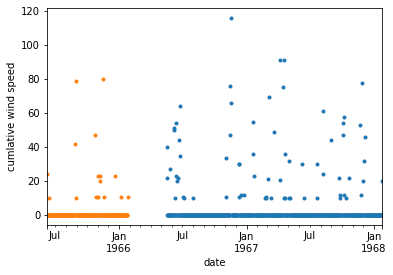

In [24]:
#NP_dict['31'].wind_speed.plot(style='.')
#NP_dict['30'].wind_speed.plot(style='.')
#NP_dict['29'].wind_speed.plot(style='.')
#NP_dict['28'].wind_speed.plot(style='.')
#NP_dict['27'].wind_speed.plot(style='.')
#NP_dict['26'].wind_speed.plot(style='.')
#NP_dict['25'].wind_speed.plot(style='.')
#NP_dict['24'].wind_speed.plot(style='.')
#NP_dict['23'].wind_speed.plot(style='.')
#NP_dict['22'].wind_speed.plot(style='.')
#NP_dict['21'].wind_speed.plot(style='.')
#NP_dict['20'].wind_speed.plot(style='.')
#NP_dict['19'].wind_speed.plot(style='.')
#NP_dict['18'].wind_speed.plot(style='.')
NP_dict['15'].wind_speed.plot(style='.')
NP_dict['14'].wind_speed.plot(style='.')
plt.ylabel('cumlative wind speed');

# depth stdv & wind

In [26]:
df = pd.DataFrame({'stdv_depth':xl2['31'].stdv.diff(), 'wind_speed':NP_dict['31'].wind_speed}, index=None, columns=None)

df = df.resample('10D').sum()

cols = ['wind_speed']
df[cols] = df[df[cols] != 0][cols]
df.dropna(inplace=True)

cols = ['stdv_depth']
df[cols] = df[df[cols] != 0][cols]
df.dropna(inplace=True)

df.dropna(inplace=True)
df

,stdv_depth,wind_speed
1988-12-26,-0.672516,183.13
1989-01-05,2.028256,273.06
1989-01-25,1.654395,65.16
1989-02-04,2.383627,98.10
1989-02-14,-1.119128,147.09
1989-02-24,-0.930926,102.03
1989-03-06,2.131574,66.10
1989-03-26,-1.056597,10.98
1989-04-05,-0.058288,32.99
1989-04-15,-0.816373,45.05


In [41]:
import scipy as sp
from scipy import stats

X = list(df.wind_speed) + list(df2.wind_speed) + list(df3.wind_speed) + list(df4.wind_speed) + list(df5.wind_speed)+ list(df6.wind_speed)+ list(df7.wind_speed)+ list(df8.wind_speed)+ list(df9.wind_speed)+ list(df10.wind_speed)+ list(df11.wind_speed)+ list(df12.wind_speed)
Y = list(df.stdv_depth) + list(df2.stdv_depth) + list(df3.stdv_depth) + list(df4.stdv_depth) + list(df5.stdv_depth)+ list(df6.stdv_depth)+ list(df7.stdv_depth)+ list(df8.stdv_depth)+ list(df9.stdv_depth)+ list(df10.stdv_depth)+ list(df11.stdv_depth)+ list(df12.stdv_depth)
res = sp.stats.linregress(X, Y)
res

LinregressResult(slope=-0.0034895932812356208, intercept=0.4888877099371848, rvalue=-0.12941348470491837, pvalue=0.07671965389771454, stderr=0.001960519926293597)

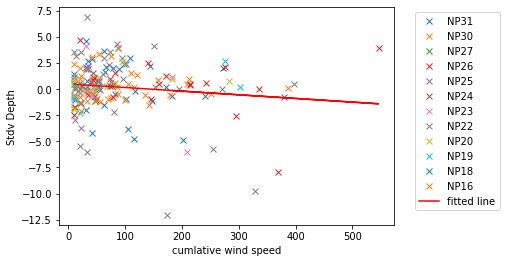

In [42]:
plt.plot(df.wind_speed, df.stdv_depth, 'x', label='NP31')
plt.plot(df2.wind_speed, df2.stdv_depth, 'x', label='NP30')
plt.plot(df3.wind_speed, df3.stdv_depth, 'x', label='NP27')
plt.plot(df4.wind_speed, df4.stdv_depth, 'x', label='NP26')
plt.plot(df5.wind_speed, df5.stdv_depth, 'x', label='NP25')
plt.plot(df6.wind_speed, df6.stdv_depth, 'x', label='NP24')
plt.plot(df7.wind_speed, df7.stdv_depth, 'x', label='NP23')
plt.plot(df8.wind_speed, df8.stdv_depth, 'x', label='NP22')
plt.plot(df9.wind_speed, df9.stdv_depth, 'x', label='NP20')
plt.plot(df10.wind_speed, df10.stdv_depth, 'x', label='NP19')
plt.plot(df11.wind_speed, df11.stdv_depth, 'x', label='NP18')
plt.plot(df11.wind_speed, df11.stdv_depth, 'x', label='NP16')

Z = []
for point in X:
    Z.append(res.intercept + res.slope*point)

plt.plot(X, Z, 'r', label='fitted line')

plt.legend()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.ylabel('Stdv Depth')
plt.xlabel('cumlative wind speed')
plt.show()

In [29]:
df2 = pd.DataFrame({'stdv_depth':xl2['30'].stdv.diff(), 'wind_speed':NP_dict['30'].wind_speed}, index=None, columns=None)

df2 = df2.resample('10D').sum()

cols = ['wind_speed']
df2[cols] = df2[df2[cols] != 0][cols]
df2.dropna(inplace=True)

cols = ['stdv_depth']
df2[cols] = df2[df2[cols] != 0][cols]
df2.dropna(inplace=True)

df2.dropna(inplace=True)
df2

,stdv_depth,wind_speed
1987-11-30,-0.790598,20.05
1987-12-10,1.296721,120.13
1987-12-20,-1.263614,56.05
1988-01-29,-0.502392,251.41
1988-03-19,3.059715,41.03
1988-03-29,-1.951016,10.04
1988-04-08,-1.505146,142.08
1988-04-18,0.476726,209.54
1988-04-28,2.028681,20.99
1988-09-05,-0.831231,74.16


In [30]:
df3 = pd.DataFrame({'stdv_depth':xl2['27'].stdv.diff(), 'wind_speed':NP_dict['27'].wind_speed}, index=None, columns=None)

df3 = df3.resample('10D').sum()

cols = ['wind_speed']
df3[cols] = df3[df3[cols] != 0][cols]
df3.dropna(inplace=True)

cols = ['stdv_depth']
df3[cols] = df3[df3[cols] != 0][cols]
df3.dropna(inplace=True)

df3.dropna(inplace=True)
df3

,stdv_depth,wind_speed
1985-10-08,0.217589,11.01
1985-12-17,1.930923,31.05
1986-03-17,0.284782,76.98


In [31]:
df4 = pd.DataFrame({'stdv_depth':xl2['26'].stdv.diff(), 'wind_speed':NP_dict['26'].wind_speed}, index=None, columns=None)

df4 = df4.resample('10D').sum()

cols = ['wind_speed']
df4[cols] = df4[df4[cols] != 0][cols]
df4.dropna(inplace=True)

cols = ['stdv_depth']
df4[cols] = df4[df4[cols] != 0][cols]
df4.dropna(inplace=True)

df4.dropna(inplace=True)
df4

,stdv_depth,wind_speed
1983-09-16,1.077341,44.12
1983-09-26,-1.005060,145.15
1983-10-06,0.308646,22.98
1983-10-16,-0.750167,79.03
1983-10-26,0.293454,73.05
1983-11-05,2.124537,275.24
1983-11-25,-0.504196,43.01
1983-12-05,-0.563528,33.97
1983-12-15,-0.033446,335.97
1983-12-25,1.528208,82.19


In [32]:
df5 = pd.DataFrame({'stdv_depth':xl2['25'].stdv.diff(), 'wind_speed':NP_dict['25'].wind_speed}, index=None, columns=None)

df5 = df5.resample('10D').sum()

cols = ['wind_speed']
df5[cols] = df5[df5[cols] != 0][cols]
df5.dropna(inplace=True)

cols = ['stdv_depth']
df5[cols] = df5[df5[cols] != 0][cols]
df5.dropna(inplace=True)

df5.dropna(inplace=True)
df5

,stdv_depth,wind_speed
1981-10-11,2.145535,30.08
1981-11-10,4.328178,86.24
1981-12-10,-3.730599,21.98
1982-01-09,0.224725,44.04
1982-02-08,-0.764632,10.01
1982-03-10,2.226940,34.11


In [33]:
df6 = pd.DataFrame({'stdv_depth':xl2['24'].stdv.diff(), 'wind_speed':NP_dict['24'].wind_speed}, index=None, columns=None)

df6 = df6.resample('10D').sum()

cols = ['wind_speed']
df6[cols] = df6[df6[cols] != 0][cols]
df6.dropna(inplace=True)

cols = ['stdv_depth']
df6[cols] = df6[df6[cols] != 0][cols]
df6.dropna(inplace=True)

df6.dropna(inplace=True)
df6

,stdv_depth,wind_speed
1978-11-19,1.483069,43.05
1978-12-19,0.669459,40.12
1979-02-17,-1.012874,47.88
1979-03-19,-1.732233,11.02


In [34]:
df7 = pd.DataFrame({'stdv_depth':xl2['23'].stdv.diff(), 'wind_speed':NP_dict['23'].wind_speed}, index=None, columns=None)

df7 = df7.resample('10D').sum()

cols = ['wind_speed']
df7[cols] = df7[df7[cols] != 0][cols]
df7.dropna(inplace=True)

cols = ['stdv_depth']
df7[cols] = df7[df7[cols] != 0][cols]
df7.dropna(inplace=True)

df7.dropna(inplace=True)
df7

,stdv_depth,wind_speed
1978-01-10,-0.529694,41.08
1978-02-09,1.114267,183.18
1978-04-10,1.867776,31.98
1978-09-07,-6.072664,208.18
1978-10-07,4.105405,31.04


In [35]:
df8 = pd.DataFrame({'stdv_depth':xl2['22'].stdv.diff(), 'wind_speed':NP_dict['22'].wind_speed}, index=None, columns=None)

df8 = df8.resample('10D').sum()

cols = ['wind_speed']
df8[cols] = df8[df8[cols] != 0][cols]
df8.dropna(inplace=True)

cols = ['stdv_depth']
df8[cols] = df8[df8[cols] != 0][cols]
df8.dropna(inplace=True)

df8.dropna(inplace=True)
df8

,stdv_depth,wind_speed
1975-01-09,0.018249,21.02
1975-02-08,1.397657,61.17
1975-09-06,-5.459474,20.06
1975-10-06,2.915326,94.99
1975-12-05,-2.197922,79.97
1976-01-04,0.125898,51.10
1976-02-03,1.872176,34.08
1976-03-04,0.288634,22.94
1976-10-10,-2.975496,10.98
1976-12-09,0.718687,53.09


In [36]:
df9 = pd.DataFrame({'stdv_depth':xl2['20'].stdv.diff(), 'wind_speed':NP_dict['20'].wind_speed}, index=None, columns=None)

df9 = df9.resample('10D').sum()

cols = ['wind_speed']
df9[cols] = df9[df9[cols] != 0][cols]
df9.dropna(inplace=True)

cols = ['stdv_depth']
df9[cols] = df9[df9[cols] != 0][cols]
df9.dropna(inplace=True)

df9.dropna(inplace=True)
df9

,stdv_depth,wind_speed
1970-11-15,2.563776,94.00
1970-12-15,0.802619,282.47
1971-01-14,-0.155890,45.94
1971-10-11,0.148289,48.06
1971-11-10,-0.650415,10.04
1972-01-09,0.952624,182.98
1972-02-08,0.676454,10.02
1972-03-09,-1.893421,10.02


In [37]:
df10 = pd.DataFrame({'stdv_depth':xl2['19'].stdv.diff(), 'wind_speed':NP_dict['19'].wind_speed}, index=None, columns=None)

df10 = df10.resample('10D').sum()

cols = ['wind_speed']
df10[cols] = df10[df10[cols] != 0][cols]
df10.dropna(inplace=True)

cols = ['stdv_depth']
df10[cols] = df10[df10[cols] != 0][cols]
df10.dropna(inplace=True)

df10.dropna(inplace=True)
df10

,stdv_depth,wind_speed
1971-01-25,0.202530,302.04
1971-02-24,2.708709,275.07
1971-03-26,-2.324049,20.05
1971-11-11,0.427072,10.04
1971-12-31,-0.961550,10.01


In [38]:
df11 = pd.DataFrame({'stdv_depth':xl2['18'].stdv.diff(), 'wind_speed':NP_dict['18'].wind_speed}, index=None, columns=None)

df11 = df11.resample('10D').sum()

cols = ['wind_speed']
df11[cols] = df11[df11[cols] != 0][cols]
df11.dropna(inplace=True)

cols = ['stdv_depth']
df11[cols] = df11[df11[cols] != 0][cols]
df11.dropna(inplace=True)

df11.dropna(inplace=True)
df11

,stdv_depth,wind_speed
1970-11-09,3.945526,87.03
1971-01-08,-1.120582,46.06


In [39]:
df12 = pd.DataFrame({'stdv_depth':xl2['16'].stdv.diff(), 'wind_speed':NP_dict['16'].wind_speed}, index=None, columns=None)

df12 = df12.resample('10D').sum()

cols = ['wind_speed']
df12[cols] = df12[df12[cols] != 0][cols]
df12.dropna(inplace=True)

cols = ['stdv_depth']
df12[cols] = df12[df12[cols] != 0][cols]
df12.dropna(inplace=True)

df12.dropna(inplace=True)
df12

,stdv_depth,wind_speed
1968-12-14,3.671979,105.11
1969-03-14,2.399298,106.06
1969-09-10,-8.597734,21.09
1969-10-10,5.042987,31.13
1969-11-09,0.767187,112.20
1969-12-09,1.548799,52.22
1970-01-18,-1.835919,185.06
1970-03-09,-0.398711,92.97
1971-01-13,-1.052921,82.96
1971-03-14,-0.375155,22.95


In [40]:
df13 = pd.DataFrame({'stdv_depth':xl2['15'].stdv.diff(), 'wind_speed':NP_dict['15'].wind_speed}, index=None, columns=None)

df13 = df13.resample('10D').sum()

cols = ['wind_speed']
df13[cols] = df13[df13[cols] != 0][cols]
df13.dropna(inplace=True)

cols = ['stdv_depth']
df13[cols] = df13[df12[cols] != 0][cols]
df13.dropna(inplace=True)

df13.dropna(inplace=True)
df13

,stdv_depth,wind_speed


# Cummlative wind

<AxesSubplot:label='640effe3-ecfa-4ba1-b528-a50c198fe702'>

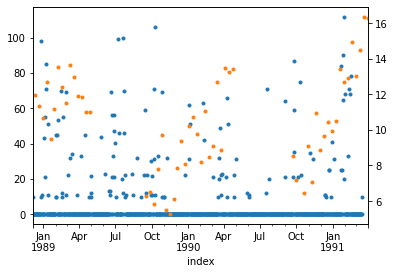

In [33]:
NP_dict['31'].wind_speed.plot(style='.')
xl2['31'].stdv.plot(style='.', secondary_y=True)